<a href="https://colab.research.google.com/github/grzegorzkwolek/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/module1-statistics-probability-and-inference/GKwolek_LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

###GK: Me, being a smartass - no missing values. "?" represents "voted present, voted present to avoid conflict of interest, and did not vote or otherwise make a position known".

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
import pandas as pd
columns = ["political_view",
           "handicapped_infants",
           "water_project_cost_sharing",
           "adoption_of_the_budget_resolution",
           "physician_fee_freeze",
           "el_salvador_aid",
           "religious_groups_in_schools",
           "anti_satellite_test_ban",
           "aid_to_nicaraguan_contras",
           "mx_missile",
           "immigration",
           "synfuels_corporation_cutback",
           "education_spending",
           "superfund_right_to_sue",
           "crime",
           "duty_free_exports",
           "export_administration_act_south_africa"]

In [95]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data", na_values = "?", names = columns)
df.head()

,political_view,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [96]:
df.shape

(435, 17)

In [97]:
df = df.replace(to_replace=['n', 'y'], value=[0, 1])
#df = df.fillna(0.5)
df.head().dtypes

political_view                             object
handicapped_infants                       float64
water_project_cost_sharing                float64
adoption_of_the_budget_resolution         float64
physician_fee_freeze                      float64
el_salvador_aid                           float64
religious_groups_in_schools               float64
anti_satellite_test_ban                   float64
aid_to_nicaraguan_contras                 float64
mx_missile                                float64
immigration                               float64
synfuels_corporation_cutback              float64
education_spending                        float64
superfund_right_to_sue                    float64
crime                                     float64
duty_free_exports                         float64
export_administration_act_south_africa    float64
dtype: object

In [98]:
df_rep = df[df["political_view"] == "republican"]
df_rep = df_rep.drop("political_view", axis=1)
df_rep.head().T

,0,1,7,8,10
handicapped_infants,0.0,0.0,0.0,0.0,0.0
water_project_cost_sharing,1.0,1.0,1.0,1.0,1.0
adoption_of_the_budget_resolution,0.0,0.0,0.0,0.0,0.0
physician_fee_freeze,1.0,1.0,1.0,1.0,1.0
el_salvador_aid,1.0,1.0,1.0,1.0,1.0
religious_groups_in_schools,1.0,1.0,1.0,1.0,0.0
anti_satellite_test_ban,0.0,0.0,0.0,0.0,0.0
aid_to_nicaraguan_contras,0.0,0.0,0.0,0.0,0.0
mx_missile,0.0,0.0,0.0,0.0,0.0
immigration,1.0,0.0,0.0,0.0,0.0


In [99]:
df_dem = df[df["political_view"] == "democrat"]
df_dem = df_dem.drop("political_view", axis = 1)
df_dem.describe()

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
count,258.000000,239.000000,260.000000,259.000000,255.000000,258.000000,259.000000,263.000000,248.000000,263.000000,255.000000,249.000000,252.000000,257.000000,251.000000,185.000000
mean,0.604651,0.502092,0.888462,0.054054,0.215686,0.476744,0.772201,0.828897,0.758065,0.471483,0.505882,0.144578,0.289683,0.350195,0.637450,0.935135
std,0.489876,0.501045,0.315405,0.226562,0.412106,0.500430,0.420224,0.377317,0.429121,0.500138,0.500949,0.352383,0.454518,0.477962,0.481697,0.246956
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
df_rep_mean = df_rep.agg('mean')
df_rep_mean = pd.DataFrame(df_rep_mean, columns=["rep"])
df_rep_mean.head()

,rep
handicapped_infants,0.187879
water_project_cost_sharing,0.506757
adoption_of_the_budget_resolution,0.134146
physician_fee_freeze,0.987879
el_salvador_aid,0.951515


In [101]:
df_dem_mean = df_dem.agg('mean')
df_dem_mean = pd.DataFrame(df_dem_mean, columns=["dem"])
df_dem_mean.head()

,dem
handicapped_infants,0.604651
water_project_cost_sharing,0.502092
adoption_of_the_budget_resolution,0.888462
physician_fee_freeze,0.054054
el_salvador_aid,0.215686


In [102]:
df_votes = pd.merge(df_dem_mean, df_rep_mean, left_index=True, right_index=True)
df_votes

,dem,rep
handicapped_infants,0.604651,0.187879
water_project_cost_sharing,0.502092,0.506757
adoption_of_the_budget_resolution,0.888462,0.134146
physician_fee_freeze,0.054054,0.987879
el_salvador_aid,0.215686,0.951515
religious_groups_in_schools,0.476744,0.897590
anti_satellite_test_ban,0.772201,0.240741
aid_to_nicaraguan_contras,0.828897,0.152866
mx_missile,0.758065,0.115152
immigration,0.471483,0.557576


In [0]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [104]:
df_votes_test = ttest_ind(df_votes['dem'], df_votes['rep'])
df_votes_test

Ttest_indResult(statistic=0.06114927032511893, pvalue=0.9516459010195506)

In [105]:
df_dem

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
2,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0
9,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
12,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
13,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,0.0,0.0,1.0,NaN
16,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,NaN,1.0,1.0,1.0,NaN,0.0,0.0,1.0
17,1.0,NaN,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [0]:
columns = ["handicapped_infants",
           "water_project_cost_sharing",
           "adoption_of_the_budget_resolution",
           "physician_fee_freeze",
           "el_salvador_aid",
           "religious_groups_in_schools",
           "anti_satellite_test_ban",
           "aid_to_nicaraguan_contras",
           "mx_missile",
           "immigration",
           "synfuels_corporation_cutback",
           "education_spending",
           "superfund_right_to_sue",
           "crime",
           "duty_free_exports",
           "export_administration_act_south_africa"]

In [0]:
def test(col):
  ttest_ind(df_dem[col],df_rep[col],nan_policy='omit')

In [0]:
def testP(col):
  return ttest_ind(df_dem[col],df_rep[col],nan_policy='omit').pvalue

In [0]:
def whosmean(col):
  return df_dem[col].mean() > df_rep[col].mean()

In [0]:
def ultimatetestoftruth(col):
  if testP(col) < 0.01 and whosmean(col) == True: print ("Dems support",col, "more than Reps (likely)")
  elif testP(col) < 0.01 and whosmean(col) != True: print ("Reps support",col, "more than Dems (likely")
  else: print ("Both Reps and Dems support",col, "equally")

In [111]:
for col in columns:
  ultimatetestoftruth(col)

Dems support handicapped_infants more than Reps (likely)
Both Reps and Dems support water_project_cost_sharing equally
Dems support adoption_of_the_budget_resolution more than Reps (likely)
Reps support physician_fee_freeze more than Dems (likely
Reps support el_salvador_aid more than Dems (likely
Reps support religious_groups_in_schools more than Dems (likely
Dems support anti_satellite_test_ban more than Reps (likely)
Dems support aid_to_nicaraguan_contras more than Reps (likely)
Dems support mx_missile more than Reps (likely)
Both Reps and Dems support immigration equally
Dems support synfuels_corporation_cutback more than Reps (likely)
Reps support education_spending more than Dems (likely
Reps support superfund_right_to_sue more than Dems (likely
Reps support crime more than Dems (likely
Dems support duty_free_exports more than Reps (likely)
Dems support export_administration_act_south_africa more than Reps (likely)


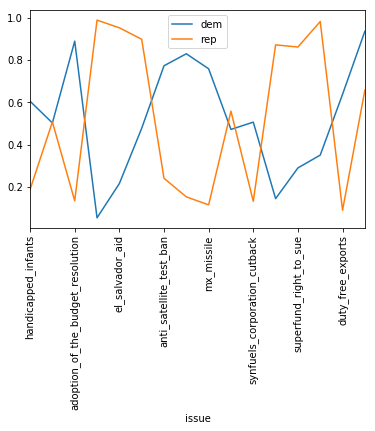

In [112]:
import matplotlib.pyplot as plt
ax = df_votes.plot()
plt.xticks(rotation = 90)
plt.xlabel("issue");